In [6]:
#import all libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.style as style
import itertools
import seaborn as sns 
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
application_data = pd.read_csv("/content/drive/MyDrive/application_data.csv")

DATA CLEANING

In [8]:
application_data.head()

,ID,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,100002,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,100002,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,100002,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,100002,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 123 entries, ID to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(42), object(16)
memory usage: 288.6+ MB


In [11]:
application_data.describe()

,ID,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.0,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,153756.000000,100002.0,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,88770.923652,0.0,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,1.000000,100002.0,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76878.500000,100002.0,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,153756.000000,100002.0,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,230633.500000,100002.0,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,307511.000000,100002.0,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [12]:
application_data.isnull().sum()

ID                                0
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 123, dtype: int64

In [13]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 123 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    ID                            int64  
 1    SK_ID_CURR                    int64  
 2    TARGET                        int64  
 3    NAME_CONTRACT_TYPE            object 
 4    CODE_GENDER                   object 
 5    FLAG_OWN_CAR                  object 
 6    FLAG_OWN_REALTY               object 
 7    CNT_CHILDREN                  int64  
 8    AMT_INCOME_TOTAL              float64
 9    AMT_CREDIT                    float64
 10   AMT_ANNUITY                   float64
 11   AMT_GOODS_PRICE               float64
 12   NAME_TYPE_SUITE               object 
 13   NAME_INCOME_TYPE              object 
 14   NAME_EDUCATION_TYPE           object 
 15   NAME_FAMILY_STATUS            object 
 16   NAME_HOUSING_TYPE             object 
 17   REGION_POPULATION_RELATIVE    float64
 18   DA

In [14]:
application_data = application_data.dropna(0)

<ipython-input-14-bb79399ab573>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  application_data = application_data.dropna(0)


In [15]:
application_data

,ID,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,72,100002,0,Cash loans,M,Y,Y,0,103500.0,573628.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,125,100002,0,Cash loans,F,Y,Y,1,202500.0,260725.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,153,100002,0,Cash loans,F,Y,N,0,202500.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,162,100002,0,Cash loans,M,Y,N,0,162000.0,263686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,256,100002,1,Cash loans,M,Y,N,1,225000.0,1019205.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,307359,100002,0,Cash loans,F,Y,Y,2,112500.0,361462.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,307360,100002,0,Cash loans,F,Y,Y,1,99000.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,307408,100002,1,Cash loans,F,Y,Y,1,261000.0,711454.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,307457,100002,0,Cash loans,F,Y,Y,0,94500.0,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [16]:
application_data.isnull().sum()

ID                            0
SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 123, dtype: int64

In [17]:
prev_application = pd.read_csv("/content/drive/MyDrive/previous_application.csv")

In [18]:
prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
prev_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [20]:
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [21]:
prev_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [22]:
application_data.value_counts

<bound method DataFrame.value_counts of             ID  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
71          72      100002       0         Cash loans           M   
124        125      100002       0         Cash loans           F   
152        153      100002       0         Cash loans           F   
161        162      100002       0         Cash loans           M   
255        256      100002       1         Cash loans           M   
...        ...         ...     ...                ...         ...   
307358  307359      100002       0         Cash loans           F   
307359  307360      100002       0         Cash loans           F   
307407  307408      100002       1         Cash loans           F   
307456  307457      100002       0         Cash loans           F   
307482  307483      100002       0         Cash loans           F   

       FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
71                Y               Y             0          1

EXPLORATORY DATA ANALYSIS

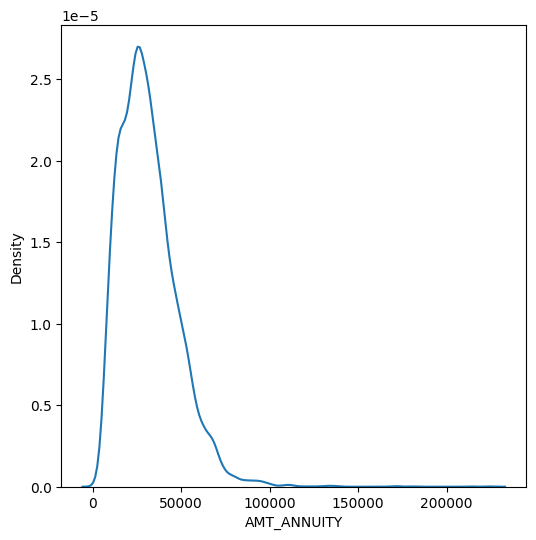

In [23]:
#univariate distribution
plt.figure(figsize=(6,6))
sns.kdeplot(application_data['AMT_ANNUITY'])
plt.show()

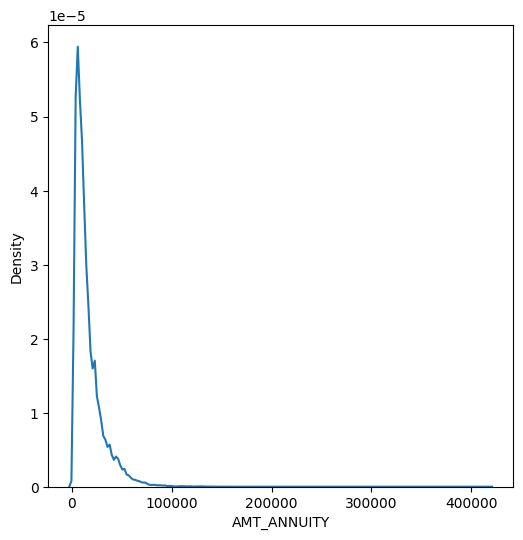

In [24]:
plt.figure(figsize=(6,6))
sns.kdeplot(prev_application['AMT_ANNUITY'])
plt.show()

In [25]:
#there is single point distribution found in previous application data because there are null values are in dataset 
#so thst we impute these null values by meadian 
prev_application['AMT_ANNUITY'].fillna(prev_application['AMT_ANNUITY'].median(),inplace = True)

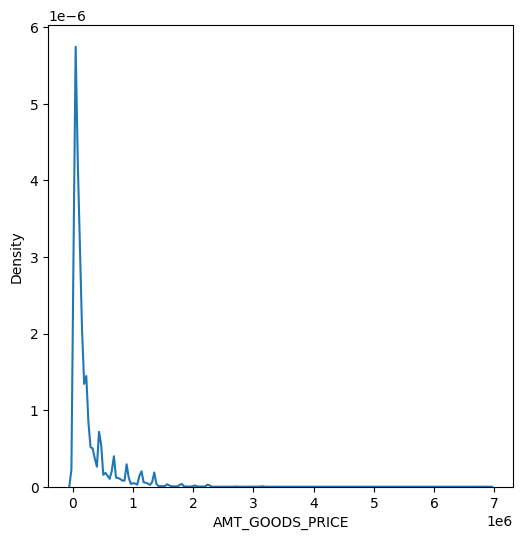

In [26]:
#Impute AMT_GOODS_PRICE with mode as the distribution is closely similar:
plt.figure(figsize=(6,6))
sns.kdeplot(prev_application['AMT_GOODS_PRICE'][pd.notnull(prev_application['AMT_GOODS_PRICE'])])
plt.show()

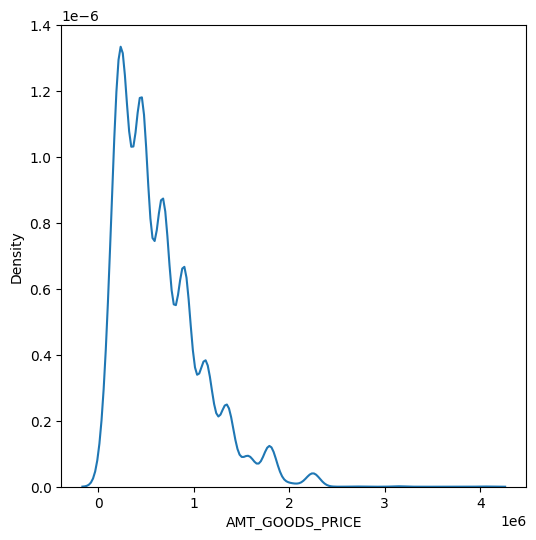

In [27]:
#similarly we can check in application data 
plt.figure(figsize=(6,6))
sns.kdeplot(application_data['AMT_GOODS_PRICE'][pd.notnull(application_data['AMT_GOODS_PRICE'])])
plt.show()

In [28]:
#we can replcae missing values wth mode from the above figure and have value counts 
prev_application['AMT_GOODS_PRICE'].fillna(prev_application['AMT_GOODS_PRICE'].mode()[0], inplace=True)
prev_application.loc[prev_application['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

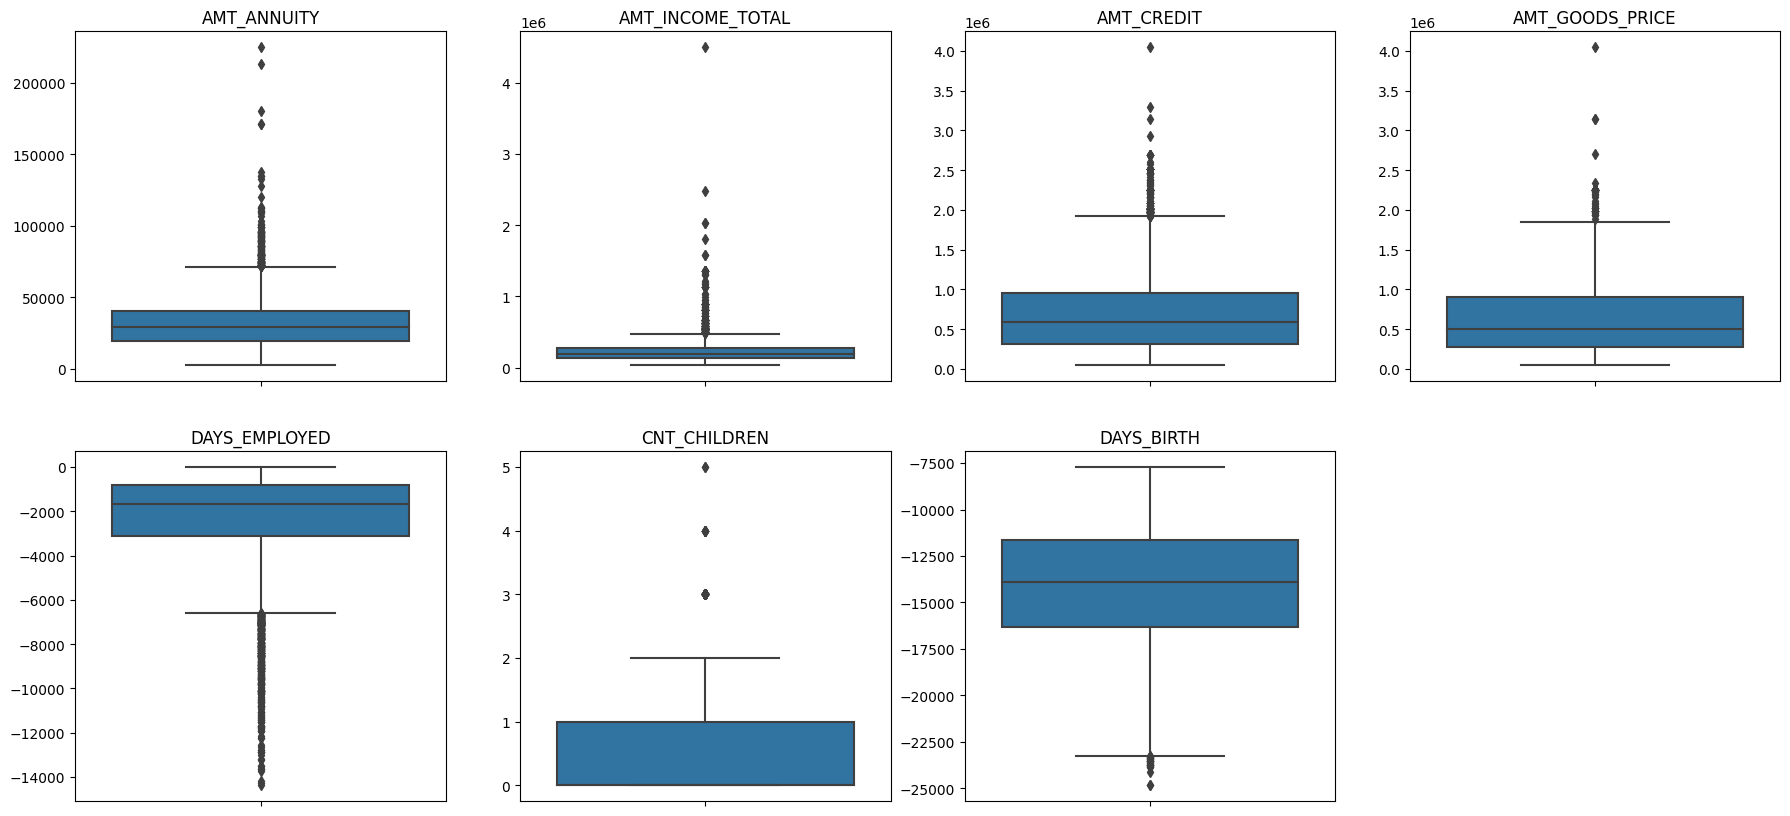

In [29]:
''' we can find the outliers in the application data by using boxplot as there are many outliers are present in it 
similarly we can find the outliers in the prev_application_data'''
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=application_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=application_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")


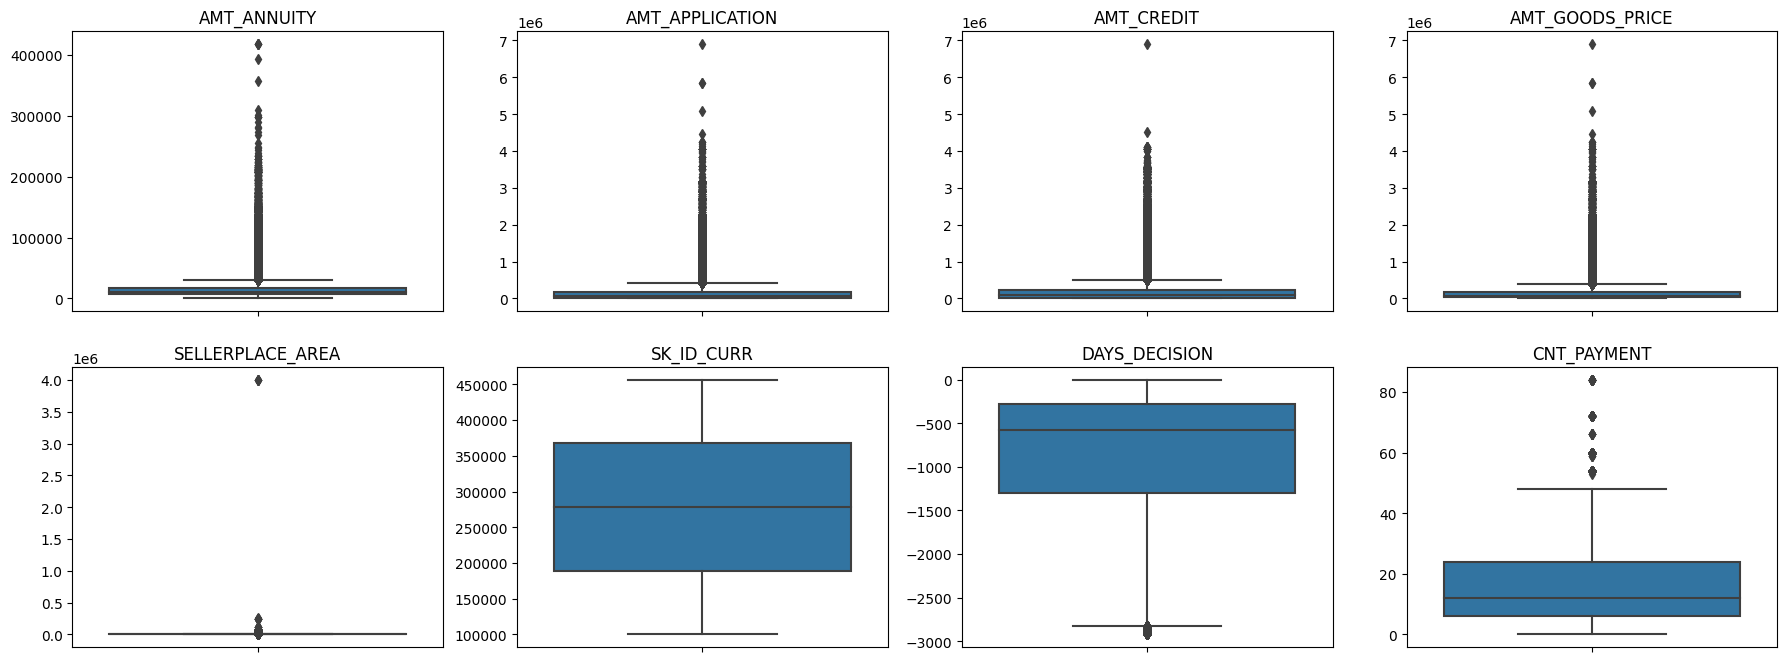

In [30]:
plt.figure(figsize=(22,8))
prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=prev_application[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=prev_application[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [31]:
Repayer = application_data.loc[application_data['TARGET']==0] # Repayers
Defaulter = application_data.loc[application_data['TARGET']==1] # Defaulters

In [32]:
# In the following session we are going to perfomr a analysis on by merging two files 

In [33]:
loan_process = pd.merge(application_data, prev_application, how='inner', on='SK_ID_CURR')
loan_process.head()

,ID,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,72,100002,0,Cash loans,M,Y,Y,0,103500.0,573628.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,125,100002,0,Cash loans,F,Y,Y,1,202500.0,260725.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
2,153,100002,0,Cash loans,F,Y,N,0,202500.0,675000.0,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
3,162,100002,0,Cash loans,M,Y,N,0,162000.0,263686.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
4,256,100002,1,Cash loans,M,Y,N,1,225000.0,1019205.0,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0


In [34]:
#plot contract status and purpose of the loan 
loan_process.describe()

,ID,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,8602.000000,8602.0,8602.000000,8602.000000,8.602000e+03,8.602000e+03,8602.000000,8.602000e+03,8602.000000,8602.000000,...,0.0,8602.0,8602.0,8602.0,8602.0,8602.0,8602.0,8602.0,8602.0,8602.0
mean,154466.528133,100002.0,0.061149,0.602534,2.228724e+05,6.999987e+05,31558.948326,6.338337e+05,0.023543,-14189.009416,...,NaN,-606.0,500.0,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0
std,89141.833302,0.0,0.239617,0.775007,1.414204e+05,4.649119e+05,16587.353415,4.294083e+05,0.016361,3259.202657,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,72.000000,100002.0,0.000000,0.000000,3.375000e+04,4.500000e+04,2317.500000,4.500000e+04,0.000290,-24835.000000,...,NaN,-606.0,500.0,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0
25%,76720.750000,100002.0,0.000000,0.000000,1.350000e+05,3.150000e+05,19548.000000,2.700000e+05,0.010556,-16299.750000,...,NaN,-606.0,500.0,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0
50%,153790.000000,100002.0,0.000000,0.000000,1.935000e+05,5.850000e+05,29209.500000,4.950000e+05,0.020246,-13883.500000,...,NaN,-606.0,500.0,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0
75%,233180.000000,100002.0,0.000000,1.000000,2.700000e+05,9.581445e+05,40320.000000,9.000000e+05,0.030755,-11664.500000,...,NaN,-606.0,500.0,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0
max,307483.000000,100002.0,1.000000,5.000000,4.500000e+06,4.050000e+06,225000.000000,4.050000e+06,0.072508,-7715.000000,...,NaN,-606.0,500.0,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0


In [35]:
#we can find the information about the loan_process 
loan_process.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 0 to 8601
Data columns (total 159 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    ID                            int64  
 1    SK_ID_CURR                    int64  
 2    TARGET                        int64  
 3    NAME_CONTRACT_TYPE_x          object 
 4    CODE_GENDER                   object 
 5    FLAG_OWN_CAR                  object 
 6    FLAG_OWN_REALTY               object 
 7    CNT_CHILDREN                  int64  
 8    AMT_INCOME_TOTAL              float64
 9    AMT_CREDIT_x                  float64
 10   AMT_ANNUITY_x                 float64
 11   AMT_GOODS_PRICE_x             float64
 12   NAME_TYPE_SUITE_x             object 
 13   NAME_INCOME_TYPE              object 
 14   NAME_EDUCATION_TYPE           object 
 15   NAME_FAMILY_STATUS            object 
 16   NAME_HOUSING_TYPE             object 
 17   REGION_POPULATION_RELATIVE    float64
 18   DAYS_B

In [36]:
#Now here is the main step we can separate the repayer and Defaulter and give the specific value in terms of 0 and 1
Repayer = application_data.loc[application_data['TARGET']==0] # Repayers
Defaulter = application_data.loc[application_data['TARGET']==1] # Defaulters

In [37]:
print(loan_process.corr())

                                 ID  SK_ID_CURR    TARGET  CNT_CHILDREN  \
ID                         1.000000         NaN  0.015479      0.005084   
SK_ID_CURR                      NaN         NaN       NaN           NaN   
TARGET                     0.015479         NaN  1.000000     -0.019993   
CNT_CHILDREN               0.005084         NaN -0.019993      1.000000   
AMT_INCOME_TOTAL          -0.011414         NaN -0.039762     -0.023069   
...                             ...         ...       ...           ...   
DAYS_FIRST_DUE                  NaN         NaN       NaN           NaN   
DAYS_LAST_DUE_1ST_VERSION       NaN         NaN       NaN           NaN   
DAYS_LAST_DUE                   NaN         NaN       NaN           NaN   
DAYS_TERMINATION                NaN         NaN       NaN           NaN   
NFLAG_INSURED_ON_APPROVAL       NaN         NaN       NaN           NaN   

                           AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
ID                     

(array([8076.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  526.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

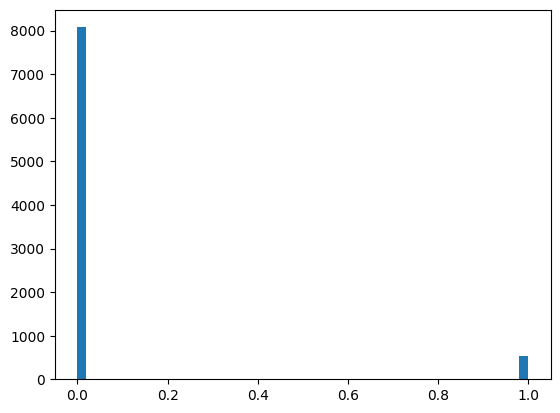

In [38]:
#with the help of Histogram we can clearly see the defaulters 
plt.hist(loan_process['TARGET'], bins=50)

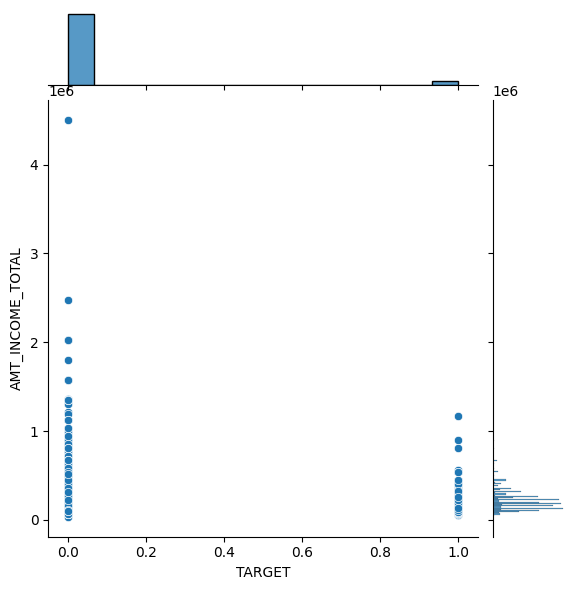

In [39]:
sns.jointplot(x = 'TARGET', y = 'AMT_INCOME_TOTAL', data = loan_process)

In [40]:
application_data["TARGET"].head()

71     0
124    0
152    0
161    0
255    1
Name: TARGET, dtype: int64

**MODEL Evaluation**

In [41]:
Repayer = application_data.loc[application_data['TARGET']==0] # Repayers
Defaulter = application_data.loc[application_data['TARGET']==1] # Defaulters

In [43]:
X = application_data["ID"].values
y = application_data["TARGET"].values

In [44]:
X = X.reshape(-1,1)
X = X.reshape(-1,1)

In [45]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.321023
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.395   
Dependent Variable: y                AIC:              5524.8809
Date:               2023-04-04 20:20 BIC:              5531.9407
No. Observations:   8602             Log-Likelihood:   -2761.4  
Df Model:           0                LL-Null:          -1979.5  
Df Residuals:       8601             LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1      -0.0000     0.0000   -49.0397   0.0000   -0.0000   -0.0000



In [46]:
'''import numpy as np
X = tuple(range(8076))
X = np.asarray(X)
y=tuple(range(8076))
y = np.asarray(y)'''

'import numpy as np\nX = tuple(range(8076))\nX = np.asarray(X)\ny=tuple(range(8076))\ny = np.asarray(y)'

In [47]:
'''X_train = X_train.reshape(-1,1)
y_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
X_test = X_test.reshape(-1,1)'''

'X_train = X_train.reshape(-1,1)\ny_train = X_train.reshape(-1,1)\nX_test = X_test.reshape(-1,1)\nX_test = X_test.reshape(-1,1)'

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)

In [49]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
cm = print(confusion_matrix)

[[2405    0]
 [ 176    0]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2405
           1       0.00      0.00      0.00       176

    accuracy                           0.93      2581
   macro avg       0.47      0.50      0.48      2581
weighted avg       0.87      0.93      0.90      2581



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


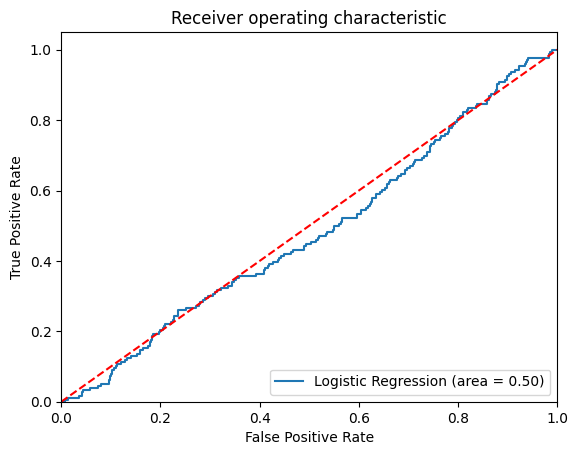

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [53]:
X_test

array([[151090],
       [112039],
       [  5052],
       ...,
       [258007],
       [ 40037],
       [253360]])

In [54]:
y_pred = model.predict(X_test)

In [55]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
pip install streamlit 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import streamlit as st 
st.sidebar.subheader("Choose classifier")
classifier = st.sidebar.selectbox("Classifier",( "Logistic Regression"))

  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2023-04-04 20:21:12.662 
  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [58]:
import pickle
pickle.dump(model, open('Bank_loan_analysis.pickle', 'wb'))

In [ ]:
import pickle
from flask import Flask, request, jsonify, render_template

# load model
model = pickle.load(open('model.pkl','rb'))

# app
app = Flask(__name__)

# routes
@app.route('/', methods=['POST'])

def predict():
    # get data
    data = request.get_json(force=True)

    # convert data into dataframe
    data.update((X, [y]) for X, y in data.items())
    data_df = pd.DataFrame.from_dict(application_data)

    # predictions
    result = model.predict(data_df)

    # send back to browser
    output = {'results': int(result[0])}

    # return data
    return jsonify(results=output)

if __name__ == '__main__':
    app.run(port = 5000, debug=True)


THE ABOVE APPLICATION MAY NOT BE WORK ON SOME ENVIORNMENT , BUT WE SHOULD TEST THE APPLICATION BY METHOD BELOW

CREATE URL LOCALLY

In [59]:
#local url
url = 'http://127.0.0.1:5000'

CREATE SAMPLE DATA LOCALLY AND JASONIFY IT

In [60]:
# sample data
import json
data = {'ID': 72
      ,
       'TARGET': 0
      ,
      }
data = json.dumps(data)

SEND REQUEST

In [ ]:
import requests
send_request = requests.post(url, data)
print(send_request)

NOW YOU WILL GET RESULT 

In [ ]:
print(send_request.json())

In [65]:
pip freeze > requirements.txt

In [ ]:
''' After analysing the datasets, there are few attributes of a client with which the bank would be able to 
identify if they will repay the loan or not.
main attributes from which bank can analyse the whole process that
1. NAME_HOUSING_TYPE
2. AMT_INCOME
3. AMT_CREDIT
4. CNT_CHILDREN AND CNT_FAM_MEMBERS
5.NAME_CASH_LOAN_PURPOSEB 
There are reasons behind rejecting the loan process by bank to many customers. 
 1. Either they are paying lately. Or they are paying with due amount. 
 2. Or they are not fit for  the terms and conditions of the bank. '''
